In [5]:
import numpy as np

In [2]:
import tensorflow as tfs
model = tf.keras.Sequential([tf.keras.layers.Dense(1, activation = tf.nn.sigmoid, input_shape=(2,))])

/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passi

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### 【問題1】公式チュートリアルモデルを分担して実行
TensorFLowの公式チュートリアルモデルを分担して実行してください。

### 別ファイルの2_2_tensorflow_tutorial_testで実行した。

### 【問題3】Iris（2値分類）をKerasで学習
TensorFlowによるIrisデータセットに対する2値分類をKerasに書き換えてください。

In [1]:
# データセットの読み込み
import pandas as pd
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:100]  # we only take the first two features.
y = iris.target[:100]

In [2]:
X.shape

(100, 4)

In [3]:
y.shape

(100,)

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

iris = load_iris()
X = iris['data'][:100]
y = iris['target'][:100]
names = iris['target_names']
feature_names = iris['feature_names']

# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_scaled, Y, test_size=0.5, random_state=2)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [7]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(4,),activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(2,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 14        
Total params: 206
Trainable params: 206
Non-trainable params: 0
_________________________________________________________________


In [8]:
#fitting the model and predicting 
model.fit(X_train_2,y_train_2,epochs=3)
y_pred_2 = model.predict(X_test_2)

y_test_class_2 = np.argmax(y_test_2,axis=1)
y_pred_class_2 = np.argmax(y_pred_2,axis=1)

Epoch 1/3
50/50 [==============================] - 1s 11ms/step - loss: 0.7367 - accuracy: 0.4000
Epoch 2/3
50/50 [==============================] - 0s 240us/step - loss: 0.4304 - accuracy: 0.9200
Epoch 3/3
50/50 [==============================] - 0s 192us/step - loss: 0.2128 - accuracy: 1.0000


In [9]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_class_2, y_pred_class_2)

1.0

### 【問題4】Iris（多値分類）をKerasで学習
TensorFlowによるIrisデータセットに対する3値分類をKerasに書き換えてください。

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, Y, test_size=0.5, random_state=2)

n_features = X.shape[1]
n_classes = Y.shape[1]

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [11]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(4,),activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(3,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 21        
Total params: 213
Trainable params: 213
Non-trainable params: 0
_________________________________________________________________


In [12]:
#fitting the model and predicting 
model.fit(X_train,y_train,epochs=50)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/50
75/75 [==============================] - 0s 2ms/step - loss: 1.0768 - accuracy: 0.4133
Epoch 2/50
75/75 [==============================] - 0s 137us/step - loss: 0.6335 - accuracy: 0.6667
Epoch 3/50
75/75 [==============================] - 0s 196us/step - loss: 0.4816 - accuracy: 0.8133
Epoch 4/50
75/75 [==============================] - 0s 104us/step - loss: 0.4049 - accuracy: 0.8400
Epoch 5/50
75/75 [==============================] - 0s 210us/step - loss: 0.3307 - accuracy: 0.8667
Epoch 6/50
75/75 [==============================] - 0s 157us/step - loss: 0.2899 - accuracy: 0.8933
Epoch 7/50
75/75 [==============================] - 0s 152us/step - loss: 0.2175 - accuracy: 0.9467
Epoch 8/50
75/75 [==============================] - 0s 148us/step - loss: 0.1653 - accuracy: 0.9600
Epoch 9/50
75/75 [==============================] - 0s 182us/step - loss: 0.1264 - accuracy: 0.9600
Epoch 10/50
75/75 [==============================] - 0s 118us/step - loss: 0.1013 - accuracy: 0.9733
E

In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_class, y_pred_class)

0.9466666666666667

### 【問題5】House PricesをKerasで学習
TensorFlowによるHouse Pricesデータセットに対する回帰をKerasに書き換えてください。

#### この中のtrain.csvをダウンロードし、  
## 目的変数としてSalePrice、   
## 説明変数として、GrLivAreaとYearBuilt  
を使ってください。説明変数はさらに増やしても構いません。

In [16]:
import itertools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

train = pd.read_csv('/Users/user/Downloads/house-prices-advanced-regression-techniques/train.csv')
print('Shape of the train data with all features:', train.shape)


test = pd.read_csv('/Users/user/Downloads/house-prices-advanced-regression-techniques/test.csv')
print('Shape of the train data with all features:', test.shape)
# test = test.select_dtypes(exclude=['object'])
# ID = test.Id
# test.fillna(0,inplace=True)
# test.drop('Id',axis = 1, inplace = True)

# print("")
# print("List of features contained our dataset:",list(train.columns))

Shape of the train data with all features: (1460, 81)
Shape of the train data with all features: (1459, 80)


In [17]:
X_data =  train[['GrLivArea', 'YearBuilt']]
X_data_np = np.array(X_data)
y_data = train[['SalePrice']]
y_data_np = np.array(y_data)

In [18]:
# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scalerX = StandardScaler()
scalery = StandardScaler()
X_scaled = scalerX.fit_transform(X_data_np)
y_scaled = scalery.fit_transform(y_data_np)

In [19]:
# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled , y_scaled, test_size=0.3, random_state=8)

In [20]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

seed = 7
np.random.seed(seed)

# Model
model = Sequential()
model.add(Dense(200, input_dim=2, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer= optimizers.Adagrad(learning_rate=0.01))

In [21]:
#fitting the model and predicting 
model.fit(X_train,y_train,epochs=100)
y_pred = model.predict(X_test)

Epoch 1/100
1022/1022 [==============================] - 0s 254us/step - loss: 0.4684
Epoch 2/100
1022/1022 [==============================] - 0s 80us/step - loss: 0.3238
Epoch 3/100
1022/1022 [==============================] - 0s 97us/step - loss: 0.3805
Epoch 4/100
1022/1022 [==============================] - 0s 64us/step - loss: 0.3413
Epoch 5/100
1022/1022 [==============================] - 0s 83us/step - loss: 0.3338
Epoch 6/100
1022/1022 [==============================] - ETA: 0s - loss: 0.341 - 0s 105us/step - loss: 0.3239
Epoch 7/100
1022/1022 [==============================] - 0s 99us/step - loss: 0.3214
Epoch 8/100
1022/1022 [==============================] - 0s 94us/step - loss: 0.3209
Epoch 9/100
1022/1022 [==============================] - 0s 131us/step - loss: 0.3186
Epoch 10/100
1022/1022 [==============================] - 0s 76us/step - loss: 0.3180: 0s - loss: 0.322
Epoch 11/100
1022/1022 [==============================] - 0s 111us/step - loss: 0.3184
Epoch 12/100
1022

In [22]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

0.30883334362086634

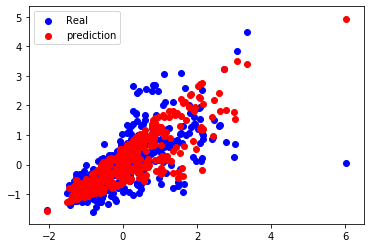

In [24]:
import matplotlib.pyplot as plt
plt.scatter(X_test[:, 0], y_test, c = 'b', label = 'Real')
plt.scatter(X_test[:, 0], y_pred, c = 'r', label = 'prediction')
plt.legend()

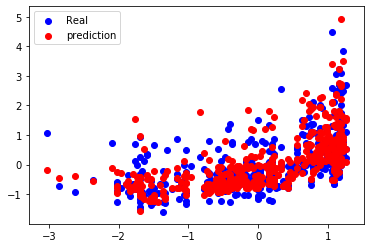

In [25]:
plt.scatter(X_test[:, 1], y_test, c = 'b', label = 'Real')
plt.scatter(X_test[:, 1], y_pred, c = 'r', label = 'prediction')
plt.legend()

### 【問題6】MNISTをKerasで学習
TensorFlowによるMNISTデータセットによる画像の多値分類をKerasに書き換えてください。

In [26]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [27]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [28]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [29]:
X_train_chan = X_train.reshape(-1,28,28,1)
X_test_chan = X_test.reshape(-1,28,28,1)

In [35]:
print(X_train_chan.shape,
      X_test_chan.shape,
      y_train_one_hot.shape,
      y_test_one_hot.shape)
      

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000, 10) (10000, 10)


In [30]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [31]:
from keras import layers
from keras import models
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation= 'relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)               

In [36]:
# train_images = train_images.reshape((60000, 28, 28, 1))
# train_images = train_images.astype('float32') / 255
# test_images = test_images.reshape((10000, 28, 28, 1))
# test_images = test_images.astype('float32') / 255
# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(X_train_chan, y_train_one_hot, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 47s 783us/step - loss: 0.1816 - accuracy: 0.9424
Epoch 2/5
60000/60000 [==============================] - 51s 846us/step - loss: 0.0467 - accuracy: 0.9857
Epoch 3/5
60000/60000 [==============================] - 47s 791us/step - loss: 0.0334 - accuracy: 0.9897
Epoch 4/5
60000/60000 [==============================] - 45s 758us/step - loss: 0.0259 - accuracy: 0.9922
Epoch 5/5
60000/60000 [==============================] - 41s 685us/step - loss: 0.0201 - accuracy: 0.9937


In [43]:
y_pred = model.predict(X_test_chan, batch_size=64)

In [44]:
from sklearn.metrics import accuracy_score

accuracy_score(np.argmax(y_test_one_hot, axis = 1), np.argmax(y_pred, axis = 1))

0.9915